In [6]:
import pandas as pd

raw_results_path = '/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/webapp_perspectiverelation.csv'
df = pd.read_csv(raw_results_path)

df = df[(df.author == 'Sihao') | (df.author == 'Daniel')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 157709 to 158392
Data columns (total 6 columns):
id                684 non-null int64
author            684 non-null object
claim_id          684 non-null int64
perspective_id    684 non-null int64
comment           684 non-null object
rel               684 non-null object
dtypes: int64(3), object(3)
memory usage: 37.4+ KB


In [4]:
save_path = '/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/annotations.csv'

df.to_csv(save_path)

In [8]:
arr_al = []
_data = []

daniel_cid = df[df.author == 'Daniel'].claim_id.unique()
sihao_cid = df[df.author == 'Sihao'].claim_id.unique()

uni_cid = [i for i in daniel_cid if i in sihao_cid]

for cid in uni_cid:
    c_df = df[df.claim_id == cid]
    uni_pid = c_df.perspective_id.unique()

    for pid in uni_pid:
        p_df = c_df[c_df.perspective_id == pid]

        group = p_df.rel.value_counts()

        _s = _u = _n = _ls = _lu =  0
        if "S" in group.index:
            _s = group.S
        if "U" in group.index:
            _u = group.U
        if "N" in group.index:
            _n = group.N
        if "A" in group.index:
            _ls = group.A
        if "B" in group.index:
            _lu = group.B        

        _data.append([cid, pid, _s,_ls, _lu, _u, _n])

with open("/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/annotation_counts.csv", 'w+') as fout:
    fout.write("claim,perspective,sup,lsup,lund,und,ns\n")
    for entry in _data:
        _entry = [str(x) for x in entry]
        fout.write(",".join(_entry)+'\n')

In [26]:
df = pd.read_csv("/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/annotation_counts.csv")
df.info()

origin_iaa_path = '/home/squirrel/ccg-new/projects/perspective/data/pilot10_origin_step1/iaa.csv'

odf = pd.read_csv(origin_iaa_path)
odf = odf[['perspective', 'sup', 'lsup', 'lund', 'und', 'not_valid', 'P_i_3_labels']]
odf.info()

google_iaa_path = '/home/squirrel/ccg-new/projects/perspective/data/pilot9_google_step1/iaa.csv'

gdf = pd.read_csv(google_iaa_path)
gdf = gdf[['claim', 'perspective', 'sup', 'lsup', 'lund', 'und', 'not_valid', 'P_i_3_labels']]
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 7 columns):
claim          327 non-null int64
perspective    327 non-null int64
sup            327 non-null int64
lsup           327 non-null int64
lund           327 non-null int64
und            327 non-null int64
ns             327 non-null int64
dtypes: int64(7)
memory usage: 18.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8135 entries, 0 to 8134
Data columns (total 7 columns):
perspective     8135 non-null int64
sup             8135 non-null int64
lsup            8135 non-null int64
lund            8135 non-null int64
und             8135 non-null int64
not_valid       8135 non-null int64
P_i_3_labels    8135 non-null float64
dtypes: float64(1), int64(6)
memory usage: 445.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 8 columns):
claim           19372 non-null int64
perspective     19372 non-null int64
sup             19372 non

In [32]:


merged_df = pd.merge(df, odf, left_on="perspective", right_on="perspective")
merged_df.info()

merged_df_2 = pd.merge(df, gdf, left_on=["claim", "perspective"], right_on=["claim", "perspective"])
merged_df_2.info()

merged_df.to_csv("/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/original.csv")
merged_df_2.to_csv("/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/google.csv")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 13 columns):
claim           90 non-null int64
perspective     90 non-null int64
sup_x           90 non-null int64
lsup_x          90 non-null int64
lund_x          90 non-null int64
und_x           90 non-null int64
ns              90 non-null int64
sup_y           90 non-null int64
lsup_y          90 non-null int64
lund_y          90 non-null int64
und_y           90 non-null int64
not_valid       90 non-null int64
P_i_3_labels    90 non-null float64
dtypes: float64(1), int64(12)
memory usage: 9.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 13 columns):
claim           237 non-null int64
perspective     237 non-null int64
sup_x           237 non-null int64
lsup_x          237 non-null int64
lund_x          237 non-null int64
und_x           237 non-null int64
ns              237 non-null int64
sup_y           237 non-null int64
lsup_y          2

In [16]:
path = "/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/side_by_side.csv"

adf = pd.read_csv(path)

c_path = "/home/squirrel/ccg-new/projects/perspective/data/database_output/webapp_claim.csv"
p_path = "/home/squirrel/ccg-new/projects/perspective/data/database_output/re-step1/webapp_perspective.csv"

cdf = pd.read_csv(c_path)
pdf = pd.read_csv(p_path)

adf["claim_title"] = ""
adf["persp_title"] = ""

adf.info()

for idx, row in adf.iterrows():
    adf.at[idx, "claim_title"] = cdf.loc[cdf.id == row.claim_id].iloc[0].title
    adf.at[idx, "persp_title"] = pdf.loc[pdf.id == row.perspective_id].iloc[0].title

adf.to_csv("/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/side_by_side_annotated.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 8 columns):
claim_id          327 non-null int64
perspective_id    327 non-null int64
author1           327 non-null object
rel1              327 non-null object
author2           327 non-null object
rel2              327 non-null object
claim_title       327 non-null object
persp_title       327 non-null object
dtypes: int64(2), object(6)
memory usage: 20.5+ KB


In [41]:
import pandas as pd
"""
Comparing AMT results from our gold annotation
"""
path = "/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/amt_result_vs_ours.csv"

df = pd.read_csv(path)

# Metric 1: vote
vote_correct = 0
vote_total = 0
maj_vote_correct = 0
maj_vote_total = len(df.index)

df["pred"] = df[["S", "U", "N"]].apply(lambda s: s.nlargest(2).index.tolist(), axis=1)

df["total_vote"] = df["S"] + df["U"] + df["N"]
df["maj_vote"] = ""
df["source"] = ""


for idx, row in df.iterrows():
    id0 = row.pred[0]
    id1 = row.pred[1]
    maj_vote = "NULL"
    if row[id0] != row[id1]:
        maj_vote = id0
        
        if id0 == row.gold.strip():
            maj_vote_correct += 1
        
    df.at[idx, "maj_vote"] = maj_vote
    df.at[idx, "source"] = "google" if row.perspective > 8136 else "original"
        
    vote_total += row.S + row.U + row.N
    vote_correct += row[row.gold.strip()] 

print("Vote accuracy: {}".format(vote_correct/vote_total))
print("Majority vote accuracy: {}".format(maj_vote_correct/maj_vote_total))

out_path = "/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/amt_result_vs_ours_annotated.csv"
df.to_csv(out_path)

Vote accuracy: 0.6232032854209446
Majority vote accuracy: 0.6238532110091743


In [39]:
# Accuracy: Originals perspectives only
odf = df.loc[df.perspective < 8136]

# Metric 1: vote
vote_correct = 0
vote_total = 0
maj_vote_correct = 0
maj_vote_total = len(odf.index)



for idx, row in odf.iterrows():
    id0 = row.pred[0]
    id1 = row.pred[1]
    if row[id0] != row[id1]:
        if id0 == row.gold.strip():
            maj_vote_correct += 1
    vote_total += row.S + row.U + row.N
    vote_correct += row[row.gold.strip()] 

print("Vote accuracy: {}".format(vote_correct/vote_total))
print("Majority vote accuracy: {}".format(maj_vote_correct/maj_vote_total))

Vote accuracy: 0.7898550724637681
Majority vote accuracy: 0.7777777777777778


In [40]:
# Accuracy: google perspectives only
gdf = df.loc[df.perspective >= 8136]

# Metric 1: vote
vote_correct = 0
vote_total = 0
maj_vote_correct = 0
maj_vote_total = len(gdf.index)

for idx, row in gdf.iterrows():
    id0 = row.pred[0]
    id1 = row.pred[1]
    if row[id0] != row[id1]:
        if id0 == row.gold.strip():
            maj_vote_correct += 1
    vote_total += row.S + row.U + row.N
    vote_correct += row[row.gold.strip()] 

print("Vote accuracy: {}".format(vote_correct/vote_total))
print("Majority vote accuracy: {}".format(maj_vote_correct/maj_vote_total))

Vote accuracy: 0.5573065902578797
Majority vote accuracy: 0.5654008438818565


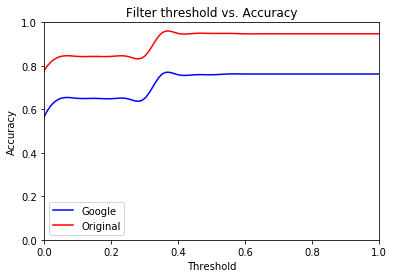

In [88]:
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt

def calc_th_vs_accuracy(df, data_points=20):
    samples = np.arange(0, 1.001, 1/data_points)
    th_list = []
    accuracy_list = []
    for th in samples:
        sub_df = df.loc[df.pi >= th]
        accuracy = len(sub_df.loc[sub_df.gold == sub_df.maj_vote].index) / len(sub_df.index) 
        th_list.append(th)
        accuracy_list.append(accuracy)
    
    return th_list, accuracy_list



path = "/home/squirrel/ccg-new/projects/perspective/data/pilot11_our_annotation/amt_result_vs_ours_with_pi.csv"

df = pd.read_csv(path)

th_list, accuracy_list = calc_th_vs_accuracy(df.loc[df.source == 'google'])
t, c, k = interpolate.splrep(th_list, accuracy_list, k=3)
xnew = np.linspace(0,1,100)
spline = interpolate.BSpline(t, c, k, extrapolate=False)
plt.plot(xnew,spline(xnew), '-b', label="Google")

th_list, accuracy_list = calc_th_vs_accuracy(df.loc[df.source == 'original'])
t, c, k = interpolate.splrep(th_list, accuracy_list, k=3)
xnew = np.linspace(0,1,100)
spline = interpolate.BSpline(t, c, k, extrapolate=False)
plt.plot(xnew,spline(xnew), '-r', label="Original")

plt.title('Filter threshold vs. Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.axis((0,1,0,1))
plt.legend()

plt.show()


    

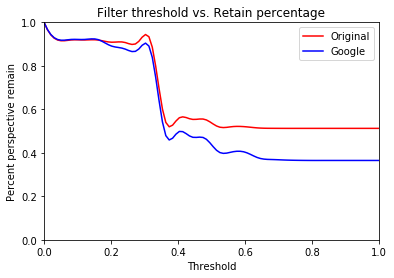

In [91]:
def calc_th_vs_counts(df, data_points=25):
    samples = np.arange(0, 1.00001, 1/data_points)
    th_list = []
    count_list = []
    for th in samples:
        sub_df = df.loc[df["P_i_3_labels"] >= th]
        c = len(sub_df.index) 
        th_list.append(th)
        count_list.append(c/len(df.index))
    
    return th_list, count_list

plt.figure(2)

# Original 
origin_path = "/home/squirrel/ccg-new/projects/perspective/data/pilot10_origin_step1/iaa.csv"
df = pd.read_csv(origin_path)
th_list, count_list = calc_th_vs_counts(df)
t, c, k = interpolate.splrep(th_list, count_list, k=3)
xnew = np.linspace(0,1,100)
spline = interpolate.BSpline(t, c, k, extrapolate=False)
plt.plot(xnew,spline(xnew), '-r', label="Original")

# Google
google_path = "/home/squirrel/ccg-new/projects/perspective/data/pilot9_google_step1/iaa.csv"
df = pd.read_csv(google_path)
th_list, count_list = calc_th_vs_counts(df)
t, c, k = interpolate.splrep(th_list, count_list, k=3)
xnew = np.linspace(0,1,100)
spline = interpolate.BSpline(t, c, k, extrapolate=False)
plt.plot(xnew,spline(xnew), '-b', label="Google")

plt.title('Filter threshold vs. Retain percentage')
plt.xlabel('Threshold')
plt.ylabel('Percent perspective remain')
plt.axis((0,1,0,1))
plt.legend()

plt.show()